In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [99]:
boston = load_boston()

In [100]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [101]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [102]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [103]:
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [104]:
boston_df['Median_Price'] = boston['target']

In [105]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [106]:
boston_df.shape

(506, 14)

In [107]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            506 non-null    float64
 2   INDUS         506 non-null    float64
 3   CHAS          506 non-null    float64
 4   NOX           506 non-null    float64
 5   RM            506 non-null    float64
 6   AGE           506 non-null    float64
 7   DIS           506 non-null    float64
 8   RAD           506 non-null    float64
 9   TAX           506 non-null    float64
 10  PTRATIO       506 non-null    float64
 11  B             506 non-null    float64
 12  LSTAT         506 non-null    float64
 13  Median_Price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [108]:
boston_df.isnull().sum()

CRIM            0
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
Median_Price    0
dtype: int64

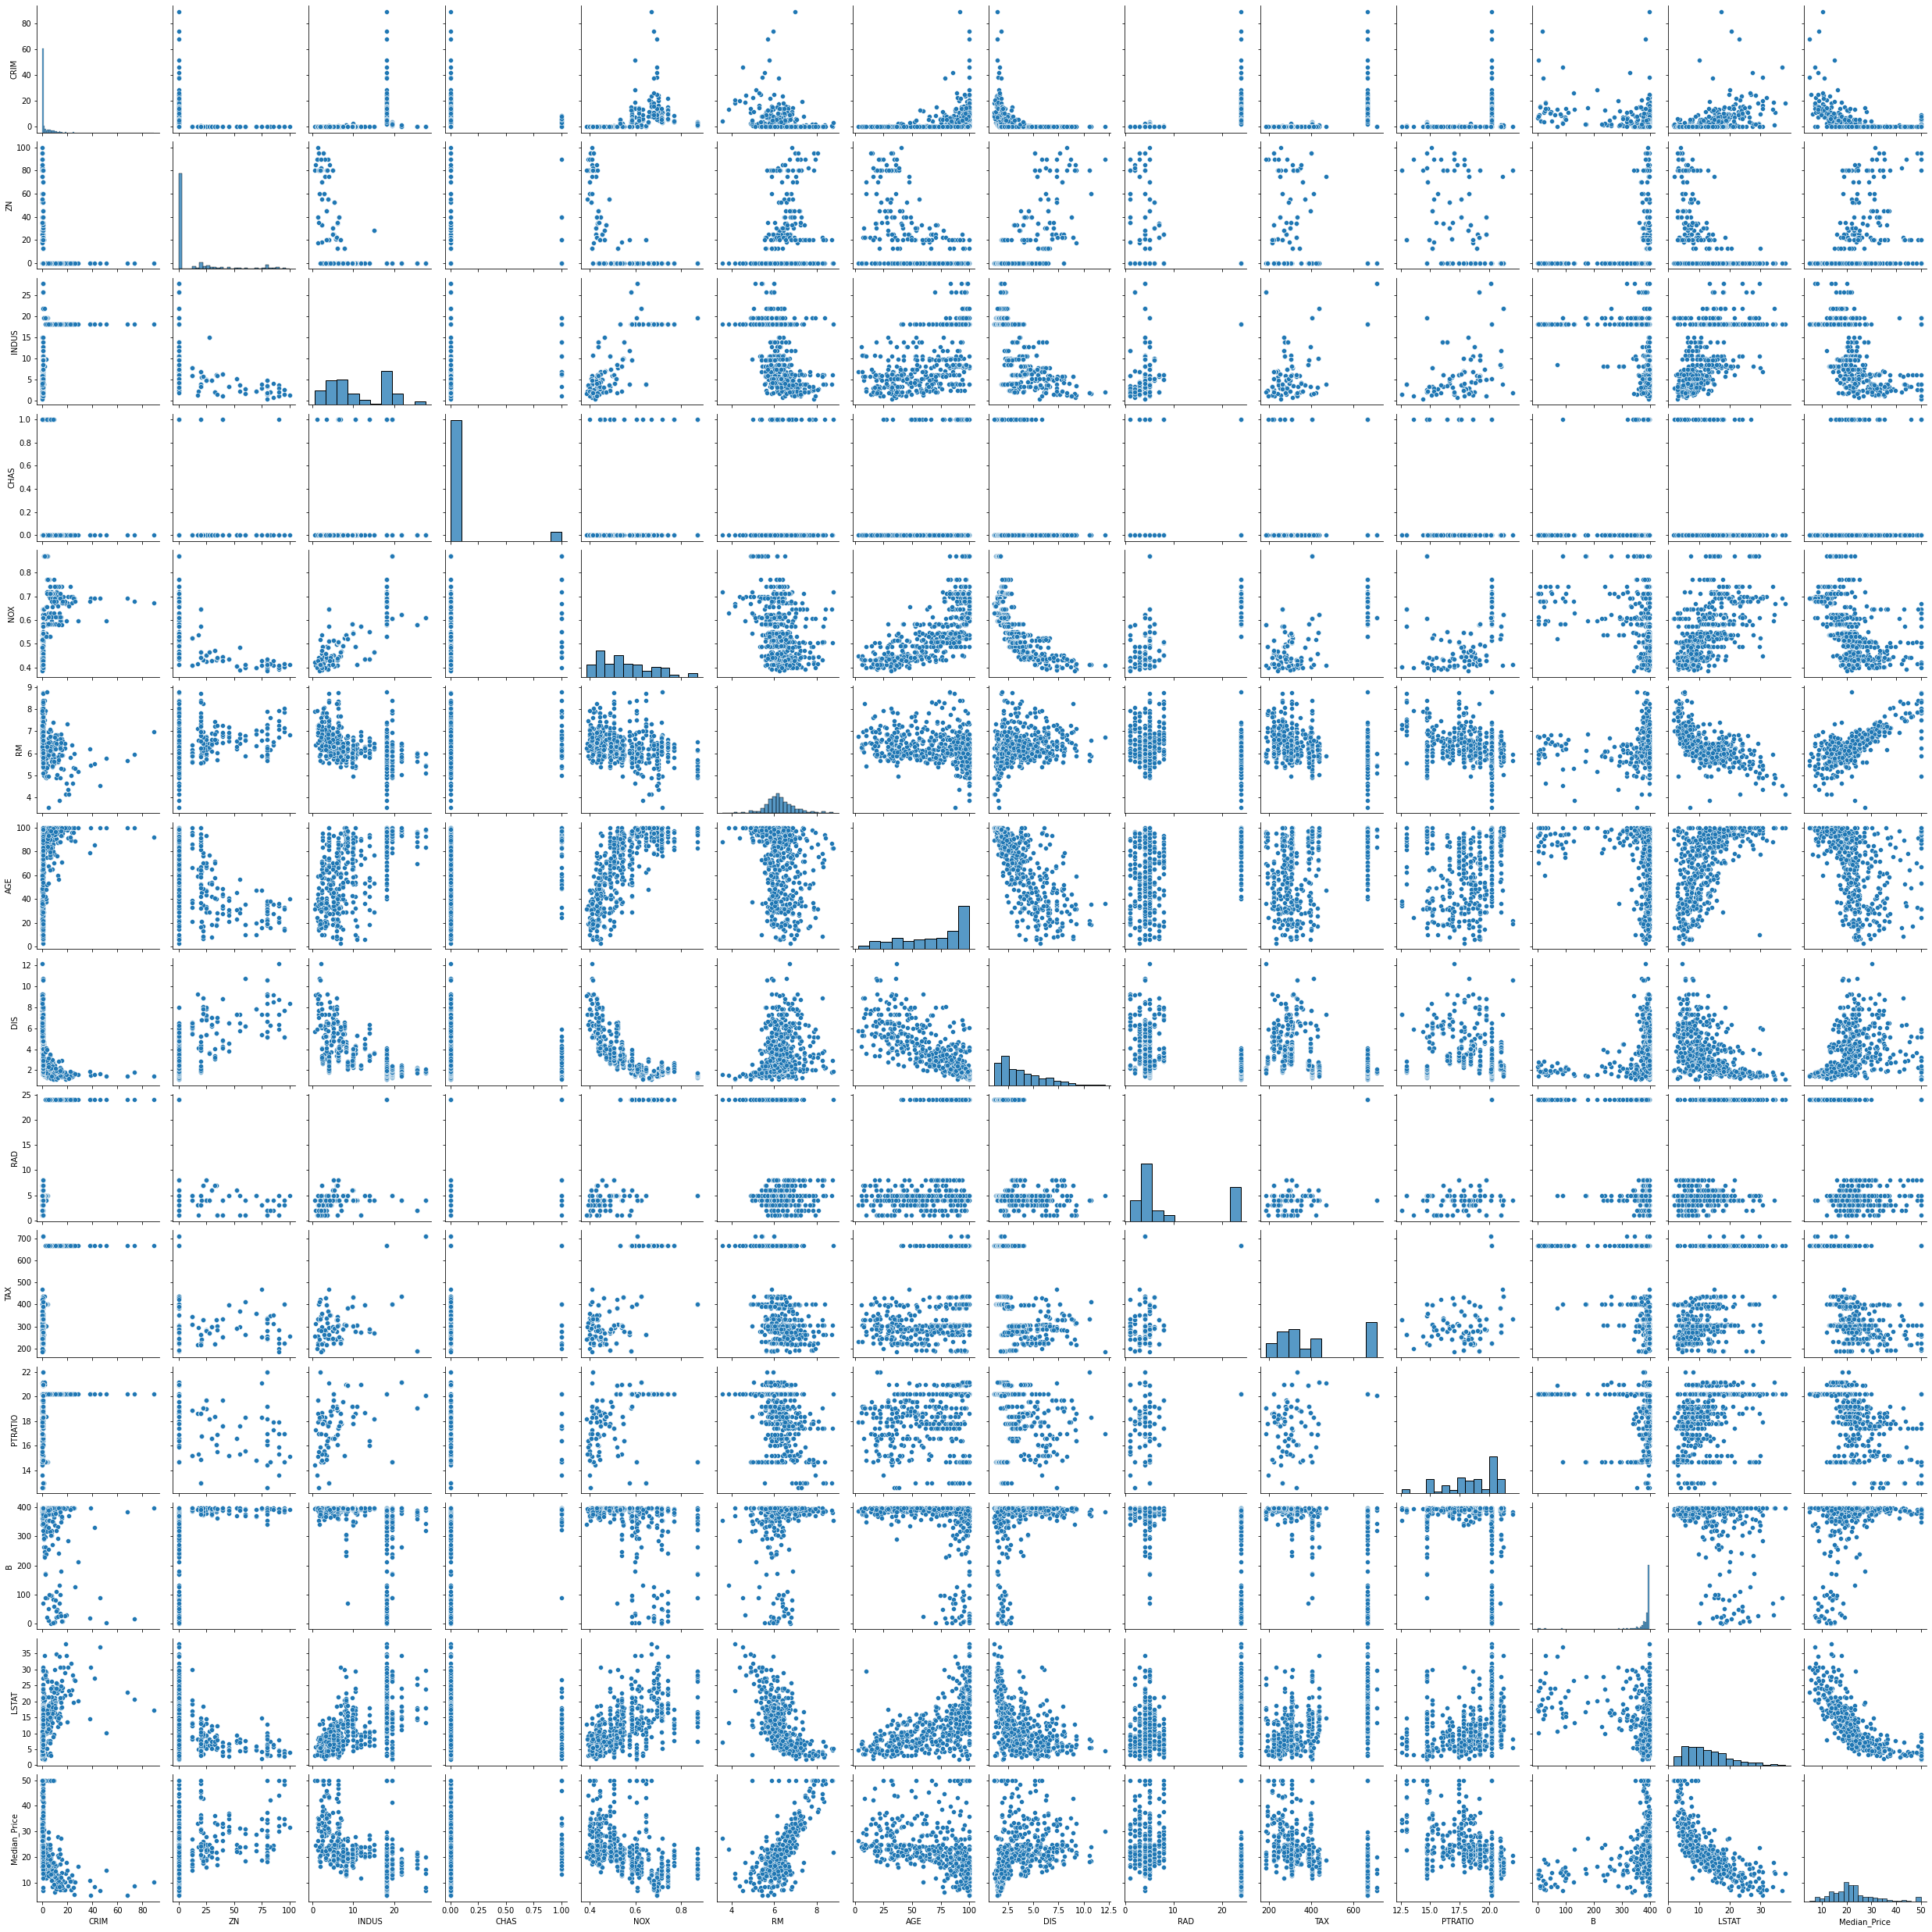

In [109]:
sns.pairplot(boston_df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

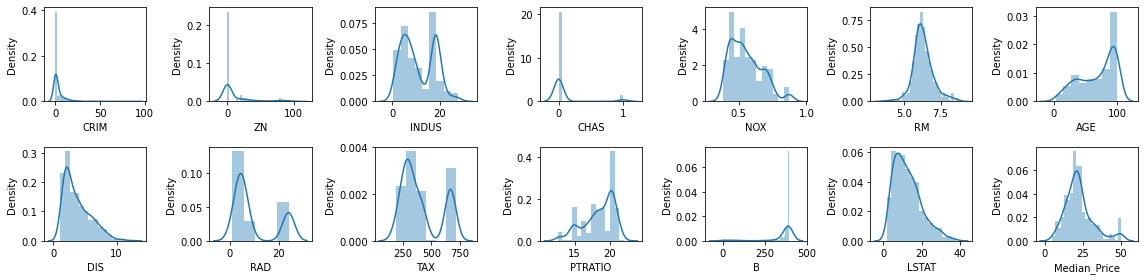

In [110]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=boston_df.columns
index=0

for i in range (rows):
    for j in range (cols):
        sns.distplot(boston_df[col[index]],ax=ax[i][j])
        index =index+1
        
plt.tight_layout()

In [111]:
corrmat=boston_df.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median_Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

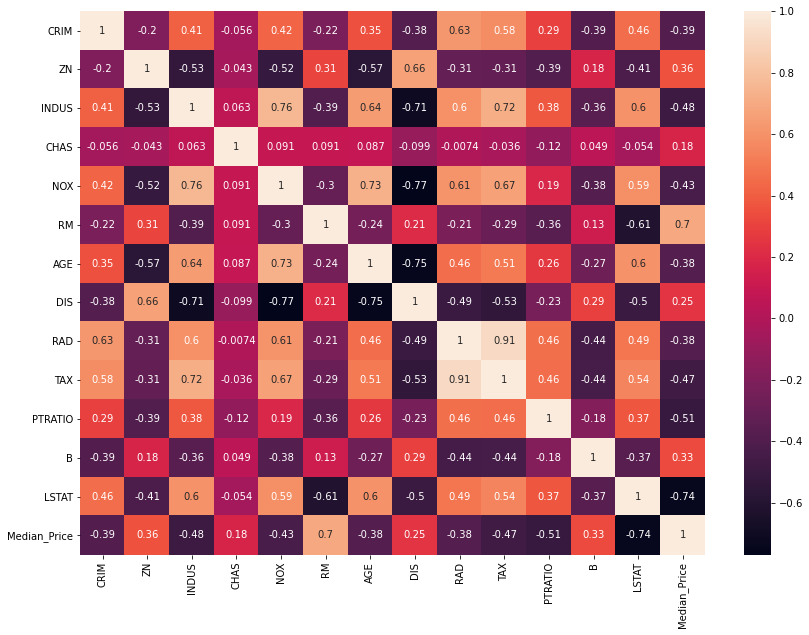

In [112]:
plt.figure(figsize=(14,10))
sns.heatmap(boston_df.corr(), annot=True)

In [113]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Median_Price'], dtype=object)

In [114]:
def getCorrelatedFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value , index = feature, columns=['corr value'])
    return df

In [137]:
threshold=0.30
corr_value=getCorrelatedFeature(corrmat['Median_Price'],threshold)
corr_value

,corr value
CRIM,-0.388305
ZN,0.360445
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
AGE,-0.376955
RAD,-0.381626
TAX,-0.468536
PTRATIO,-0.507787
B,0.333461


In [138]:
corr_value.index.values

array(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'Median_Price'], dtype=object)

In [139]:
correlated_data = boston_df[corr_value.index]
correlated_data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,Median_Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33,36.2


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

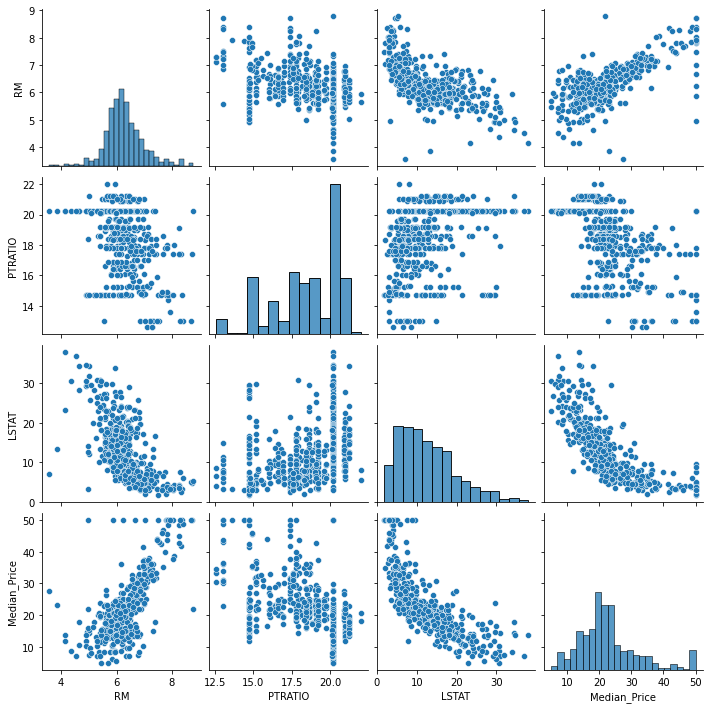

In [119]:
sns.pairplot(correlated_data)
plt.tight_layout

<AxesSubplot:>

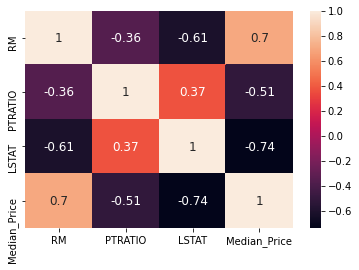

In [120]:
sns.heatmap(correlated_data.corr(),annot=True,annot_kws={'size':12})

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median_Price', ylabel='Density'>

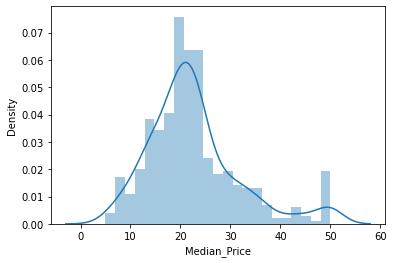

In [121]:
sns.distplot(boston_df['Median_Price'])

In [ ]:
boston_df.corr()

## Train Test Split

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
from sklearn import metrics

In [141]:
X = correlated_data.drop('Median_Price', axis=1)
y = correlated_data.Median_Price
X.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,3.0,222.0,18.7,396.90,5.33


In [142]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

In [143]:
train_x.shape,test_x.shape

((354, 11), (152, 11))

In [144]:
train_x.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.624,5.019,100.0,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.464,6.538,58.7,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.624,6.335,98.2,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.400,6.345,20.1,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.581,5.961,92.9,2.0,188.0,19.1,378.09,17.93


In [145]:
train_y.head()

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
Name: Median_Price, dtype: float64

## LR Model

In [146]:
model = LinearRegression()


In [147]:
model.fit(train_x, train_y)

LinearRegression()

In [148]:
model.coef_

array([-1.00926682e-01,  2.81125644e-03,  1.26720811e-01, -9.50092740e+00,
        4.37674952e+00,  2.38666869e-02,  2.68615144e-01, -1.25727125e-02,
       -1.21068990e+00,  8.49562637e-03, -4.88590332e-01])

In [149]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['coefficient'])

In [150]:
model.intercept_

25.59327193351953

In [151]:
train_y_hat = model.predict(train_x)
test_y_hat = model.predict(test_x)

In [152]:
print('Train MSE', math.sqrt(mean_squared_error(train_y, train_y_hat)))
print('Test MSE', math.sqrt(mean_squared_error(test_y, test_y_hat)))

Train MSE 4.7708906081159315
Test MSE 5.5343647026502145


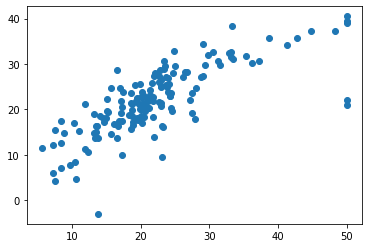

In [133]:
plt.scatter(test_y,test_y_hat)

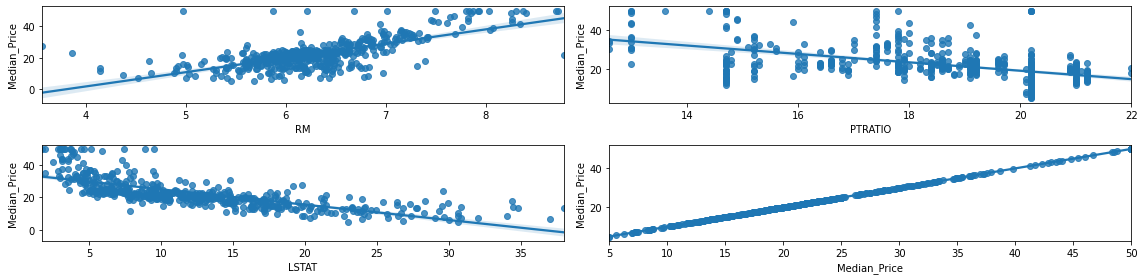

In [134]:
rows=2
cols=2
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=correlated_data.columns
index=0

for i in range (rows):
    for j in range (cols):
        sns.regplot(x=correlated_data[col[index]],y=correlated_data['Median_Price'],ax=ax[i][j])
        index =index+1
        
plt.tight_layout()

In [ ]:
from sklearn.metrics import r2_score

In [135]:
score=r2_score(test_y,test_y_hat)

In [136]:
score

0.598559144009056